In [8]:
pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

## Importing Dataset

In [2]:
train_path = r"E:\Building crack and road crack paper\Balanced RGB PreProcess Surface Crack Dataset\Train"
validation_path=r"E:\Building crack and road crack paper\Balanced RGB PreProcess Surface Crack Dataset\Val"
test_path=r"E:\Building crack and road crack paper\Balanced RGB PreProcess Surface Crack Dataset\Test"


## Create CNN Model 

In [3]:
input_shape = (227, 227, 3)
Wh = 3
Ww = 3

In [4]:
model = Sequential()
model.add(Conv2D(input_shape=input_shape , data_format="channels_last", kernel_size=(Wh,Ww), filters=32, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 227, 227, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 227, 227, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 111, 111, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 64)        1

## let's Train Our Model 

In [4]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)


In [5]:
val_dataset = image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (227,227),
    batch_size = 64,
    class_mode = 'binary')

Found 15000 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Negative': 0, 'Positive': 1}

In [8]:
validation_generator = test_dataset.flow_from_directory(
    validation_path,
    target_size = (227,227),
    batch_size = 64,
    class_mode = 'binary')

Found 4000 images belonging to 2 classes.


In [12]:
his = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs=10,
    steps_per_epoch = len(train_generator),
    validation_steps=len(validation_generator)
)

Epoch 1/10
235/235 [==============================] - 203s 748ms/step - loss: 0.1821 - accuracy: 0.9369 - val_loss: 0.0132 - val_accuracy: 0.9965
Epoch 2/10
235/235 [==============================] - 126s 535ms/step - loss: 0.0901 - accuracy: 0.9931 - val_loss: 0.0121 - val_accuracy: 0.9962
Epoch 3/10
235/235 [==============================] - 126s 536ms/step - loss: 0.0430 - accuracy: 0.9950 - val_loss: 0.0109 - val_accuracy: 0.9962
Epoch 4/10
235/235 [==============================] - 125s 532ms/step - loss: 0.0467 - accuracy: 0.9949 - val_loss: 0.0255 - val_accuracy: 0.9962
Epoch 5/10
235/235 [==============================] - 125s 533ms/step - loss: 0.0433 - accuracy: 0.9943 - val_loss: 0.0117 - val_accuracy: 0.9970
Epoch 6/10
235/235 [==============================] - 126s 534ms/step - loss: 0.0436 - accuracy: 0.9957 - val_loss: 0.0083 - val_accuracy: 0.9975
Epoch 7/10
235/235 [==============================] - 125s 532ms/step - loss: 0.0298 - accuracy: 0.9958 - val_loss: 0.0092 -

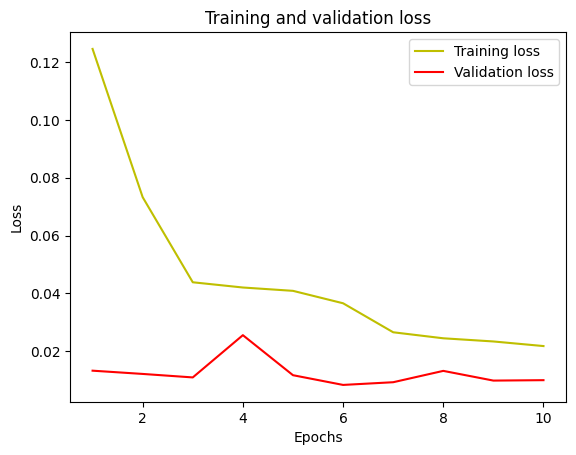

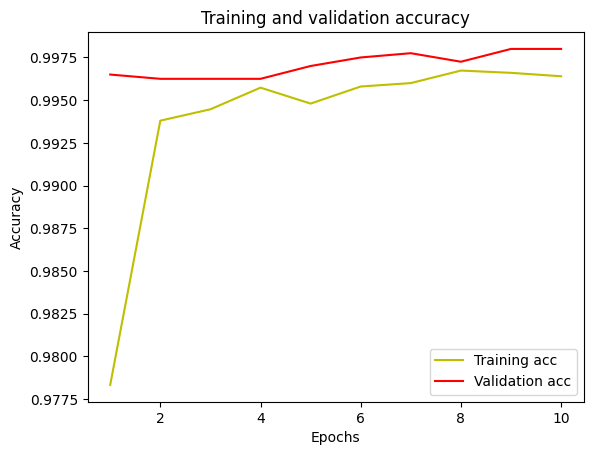

In [13]:
#plot the training and validation accuracy and loss at each epoch
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model Evaluate 

In [9]:
Prediction_generator = test_dataset.flow_from_directory(
    test_path,
    target_size = (227,227),
    batch_size = 64,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [102]:
score=model.evaluate(Prediction_generator)
print('Final Accuracy : ', score[1]*100, "%" )
print('Final Loss : ', score[0])

16/16 [==============================] - 1s 77ms/step - loss: 7.5134e-04 - accuracy: 1.0000
Final Accuracy :  100.0 %
Final Loss :  0.0007513428572565317


## Saving the Model 

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_RGBPreProcessedDataset_Surface_Crack_Prediction.h5')

## Image Prediction 

In [108]:
raw_predicted_label = model.predict(Prediction_generator, batch_size=None, verbose=0, steps=None)
y_pred = []
print(raw_predicted_label.size)
for i in range(0,raw_predicted_label.size):
    if (raw_y_pred[i]>0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred

1000


[0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,


In [105]:
Prediction_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_RGBPreProcessedDataset_Surface_Crack_Prediction.h5')

In [4]:
import cv2
def process_image(image):
    ret,bi_inv = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    #plt.imshow(bi_inv, 'gray')
    return bi_inv, image

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import cv2
from skimage import io
from skimage import data
from skimage.color import rgb2gray
from skimage.data import page
from skimage.filters import (threshold_sauvola)
from PIL import Image
def Crack_Width_Calculation(img):
    img_gray = rgb2gray(img)

    # window size 'Concrete Crack Identification Using a UAV Incorporating Hybrid Image Processing' 
    
    # window size and k value were used without any changes from the
    # 'Concrete Crack Identification Using a UAV Incorporating Hybrid Image Processing' thesis.
    window_size_Pw = 71
    thresh_sauvola_Pw = threshold_sauvola(img_gray, window_size=window_size_Pw, k=0.42)

    binary_sauvola_Pw = img_gray > thresh_sauvola_Pw
    binary_sauvola_Pw_bw = img_gray > thresh_sauvola_Pw

    binary_sauvola_Pw_bw.dtype = 'uint8'
    binary_sauvola_Pw_bw *= 255
    
    # Image Binarization
    # The list which saves the images after image binarization.
    #sauvola_frames_Pw_bw = binary_sauvola_Pw_bw
    sauvola_frames_Pw = binary_sauvola_Pw
    from matplotlib import pyplot as plt
    plt.imshow(sauvola_frames_Pw)
    plt.show()
    
    from skimage.morphology import skeletonize
    from skimage.util import invert

    #skeleton_frames_Pw = []

    #for i in range(0,len(cropped_frames)):
    img_Pw = invert(sauvola_frames_Pw)

    skeleton_Pw = skeletonize(img_Pw)

    skeleton_Pw.dtype = 'uint8'

    skeleton_Pw *= 255

    # Skeletonize
    # The list which saves the images after the skeletonization.
    skeleton_frames_Pw = skeleton_Pw
    plt.imshow(skeleton_frames_Pw)
    plt.show()
    
    import numpy as np
    from scipy import ndimage as ndi
    from skimage import feature

    #edges_frames_Pw = []
    #edges_frames_Pl = []

    #for i in range(0,len(cropped_frames)):
    edges_Pw = feature.canny(sauvola_frames_Pw, 0.09)

    edges_Pw.dtype = 'uint8'

    edges_Pw *= 255
    
    # Edge detection
    # The list which saves the images after edge detection.
    edges_frames_Pw = edges_Pw
    plt.imshow(edges_frames_Pw)
    plt.show()
    
#  Calculate the width of the crack.
# 1) Find skeleton using BFS
# 2) Set the direction of the crack by searching skeletion pixels which are 5 pixels away from the skeleton pixel.
# 3) Draw a perpendicular line of the direction
# 4) The perpendicular line meets the edge. The distance is calulated by counting pixels on the line.
# 5) Convert the number of pixels into real mm width, and classify the danger group.
    import queue
    import math

    def Average(lst):
        return sum(lst) / len(lst)

    dx_dir_right = [-5,-5,-5,-4,-3,-2,-1,0,1,2,3,4,5,5]
    dy_dir_right = [0,1,2,3,4,5,5,5,5,5,4,3,2,1]

    dx_dir_left = [5,5,5,4,3,2,1,0,-1,-2,-3,-4,-5,-5]
    dy_dir_left = [0,-1,-2,-3,-4,-5,-5,-5,-5,-5,-4,-3,-2,-1]

    dx_bfs = [-1,-1,0,1,1,1,0,-1]
    dy_bfs = [0,1,1,1,0,-1,-1,-1]

    save_result = []
    save_risk = []


    #for k in range(0,len(skeleton_frames_Pw)):
        #print('--------------'' : ',(saving_bounding_boxes[k][0]//6)*0.25,'초','-----------------')
        # BFS
        # Searching the skeleton through BFS.
    start = [0,0]
    next = []
    q = queue.Queue()
    q.put(start)

    len_x = skeleton_frames_Pw.shape[0]
    len_y = skeleton_frames_Pw.shape[1]

    visit = np.zeros((len_x,len_y))
    crack_width_list = []
    
        # Skeleton pixel로 부터 균열의 진행 방향을 찾아냅니다.
        # Find out the direction of the crack from skeleton pixel.
    while(q.empty() == 0):
        next = q.get()
        x = next[0]
        y = next[1]
        right_x = right_y = left_x = left_y = -1

        if(skeleton_frames_Pw[x][y] == 255):
            # Skeleton
            # Estimating the direction of the crack from skeleton
            for i in range(0, len(dx_dir_right)):
                right_x = x + dx_dir_right[i]
                right_y = y + dy_dir_right[i]
                if(right_x<0 or right_y<0 or right_x>=len_x or right_y>=len_y): 
                    right_x = right_y = -1
                    continue;
                if(skeleton_frames_Pw[right_x][right_y] == 255): break;
                if(i==13): right_x = right_y = -1

            if(right_x == -1): 
                right_x = x
                right_y = y

            for i in range(0, len(dx_dir_left)):
                left_x = x + dx_dir_left[i]
                left_y = y + dy_dir_left[i]
                if(left_x <0 or left_y<0 or left_x >=len_x or left_y>=len_y): 
                    left_x = left_y = -1
                    continue;
                if(skeleton_frames_Pw[left_x][left_y] == 255): break;
                if(i==13): left_x = left_y = -1

            if(left_x == -1): 
                left_x = x
                left_y = y
            
            # acos 
            # Set the direction of the crack as angle(theta) by using acos formula
            base = right_y - left_y
            height = right_x - left_x
            hypotenuse = math.sqrt(base*base + height*height)

            if(base==0 and height != 0): theta = 90.0
            elif(base==0 and height == 0): continue
            else: theta = math.degrees(math.acos((base * base + hypotenuse * hypotenuse - height * height)/(2.0 * base * hypotenuse)))

            theta += 90
            dist = 0
            
         
            # Calculate the distance if the perpendicular line meets the edge of the crack.
            for i in range(0,2):
                
                pix_x = x
                pix_y = y
                if(theta>360): theta -= 360
                elif(theta<0): theta += 360    
                
                if(theta == 0.0 or theta == 360.0):
                    while(1):
                        pix_y+=1
                        if(pix_y>=len_y):
                            pix_x = x
                            pix_y = y
                            break;
                        if(edges_frames_Pw[pix_x][pix_y]==255): break;

                elif(theta == 90.0):
                    while(1):
                        pix_x-=1
                        if(pix_x<0):
                            pix_x = x
                            pix_y = y
                            break;
                        if(edges_frames_Pw[pix_x][pix_y]==255): break;

                elif(theta == 180.0):
                    while(1):
                        pix_y-=1
                        if(pix_y<0):
                            pix_x = x
                            pix_y = y
                            break;
                        if(edges_frames_Pw[pix_x][pix_y]==255): break;

                elif(theta == 270.0):
                    while(1):
                        pix_x+=1
                        if(pix_x>=len_x):
                            pix_x = x
                            pix_y = y
                            break;
                        if(edges_frames_Pw[pix_x][pix_y]==255): break;
                else:
                    a = 1
                    radian = math.radians(theta)
                    while(1):        
                        pix_x = x - round(a*math.sin(radian))
                        pix_y = y + round(a*math.cos(radian))
                        if(pix_x<0 or pix_y<0 or pix_x>=len_x or pix_y>=len_y): 
                            pix_x=x
                            pix_y=y
                            break;
                        if(edges_frames_Pw[pix_x][pix_y]==255): break;

                        if(theta>0 and theta<90):
                            if(pix_y+1<len_y and edges_frames_Pw[pix_x][pix_y+1]==255): 
                                pix_y+=1
                                break;
                            if(pix_x-1>=0 and edges_frames_Pw[pix_x-1][pix_y]==255): 
                                pix_x-=1
                                break;

                        elif(theta>90 and theta<180):
                            if(pix_y-1>=0 and edges_frames_Pw[pix_x][pix_y-1]==255): 
                                pix_y-=1
                                break;
                            if(pix_x-1>=0 and edges_frames_Pw[pix_x-1][pix_y]==255): 
                                pix_x-=1
                                break;

                        elif(theta>180 and theta<270):
                            if(pix_y-1>=0 and edges_frames_Pw[pix_x][pix_y-1]==255): 
                                pix_y-=1
                                break;
                            if(pix_x+1<len_x and edges_frames_Pw[pix_x+1][pix_y]==255): 
                                pix_x+=1
                                break;         

                        elif(theta>270 and theta<360): 
                            if(pix_y+1<len_y and edges_frames_Pw[pix_x][pix_y+1]==255): 
                                pix_y+=1
                                break;
                            if(pix_x+1<len_x and edges_frames_Pw[pix_x+1][pix_y]==255): 
                                pix_x+=1
                                break;
                        a+=1
        
                dist += math.sqrt((y-pix_y)**2 + (x-pix_x)**2)
                theta += 180        

            # 균열의 폭을 저장하는 리스트입니다.
            # The list which saves the width of the crack.
            crack_width_list.append(dist)
        
        for i in range(0,8):
            next_x = x + dx_bfs[i]
            next_y = y + dy_bfs[i]

            if(next_x<0 or next_y<0 or next_x>=len_x or next_y>=len_y): continue;
            if(visit[next_x][next_y] == 0): 
                q.put([next_x,next_y])
                visit[next_x][next_y] = 1
                
    crack_width_list.sort(reverse=True)
   
    # 실제의 길이로 변환합니다.
    # Convert into real width.
    print(len(crack_width_list))
    if(len(crack_width_list)==0): 
        save_result.append(0)
        real_width = 0
    elif(len(crack_width_list)<10):
        real_width = round(crack_width_list[len(crack_width_list)-1]*0.0192, 2)
        #real_width = round(crack_width_list[len(crack_width_list)-1]*0.033, 2)
        save_result.append(real_width)
    else: 
        real_width = round(Average(crack_width_list)*0.0192, 2)
        #real_width = round(Average(crack_width_list)*0.033, 2)
        #real_width = round(crack_width_list[9]*0.92, 2)
        save_result.append(real_width)
    
    print('Crack width: ',real_width)
   
    # 위험군을 분류합니다.
    # Classify the danger group.
    if(real_width > 0.4):
        save_risk.append('High')
        print('Risk Group : High\n')
    elif(real_width<=0.4 and real_width>=0.2): 
        save_risk.append('middle')
        print('Risk Group : Moderate\n')
    else: 
        save_risk.append('under')
        print('Risk Group : under\n')
        
    # 해당 정보를 텍스트 파일에 저장합니다.
    # Save those information into text files.
    #f1 = open("C:\\Users\\harsh\\width.txt", 'w')
    #f2 = open("C:\\Users\\harsh\\risk.txt", 'w')

    #for z in range(0, len(save_result)):
    #f1.write(str(save_result)+'mm'+'\n')
    #f1.close()

    #for z in range(0, len(save_risk)):
    #f2.write(str(save_risk)+'\n')
    #f2.close()
    

In [11]:
from keras.preprocessing.image import img_to_array
img_path = r"C:\Users\Parth\Desktop\B.E. PROJECT\Surface crack\Surface Crack Dataset\Moderate\02020.jpg"
img1=cv2.imread(img_path)
img = cv2.imread(img_path, 0)
bi_inv, colored_img = process_image(img)
backtorgb = cv2.cvtColor(bi_inv,cv2.COLOR_GRAY2RGB)
x=img_to_array(backtorgb)
x

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

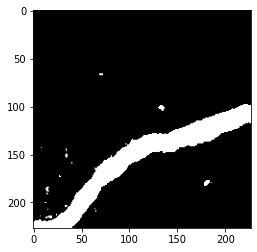

In [12]:
from matplotlib import pyplot as plt
plt.imshow(backtorgb)
plt.show()

In [13]:
x.shape

(227, 227, 3)

In [14]:
x=x/255
x=np.expand_dims(x,axis=0)
img = np.reshape(x,[1,227,227,3])
img.shape

(1, 227, 227, 3)

Raw Predicted Label(Numeric): 1.0

Predicted Label : Crack


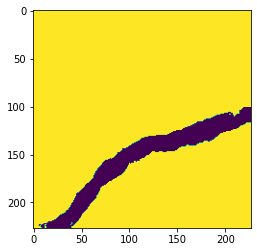

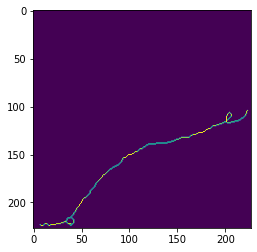

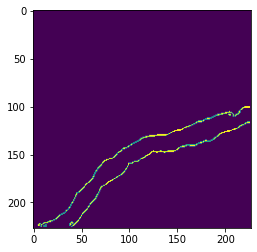

245
Crack width:  0.29
Risk Group : Moderate



In [15]:
raw_predicted_label = model.predict(img, batch_size=None, verbose=0, steps=None)[0][0]
    
predicted_label=1;    
if(raw_predicted_label<0.8):
    predicted_label=0
        
predicted_label_str='Crack'

if(predicted_label==0):
    predicted_label_str='No Crack'
        
print('Raw Predicted Label(Numeric): '+str(raw_predicted_label))
print('\nPredicted Label : '+predicted_label_str)
if(predicted_label==1):
    Crack_Width_Calculation(img1)

# Confusion Matrix

In [10]:
import cv2
def process_image(image):
    ret,bi_inv = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    #plt.imshow(bi_inv, 'gray')
    return bi_inv, image

def create_data(tdir_, type_, frm, to, t_data):
    colored_data=[]
    bi_inv_data=[]
    print('Working On '+t_data+' Data : '+type_ +'\n')
    rng = ["%05d" % x for x in range(frm, to+1)]
    for i in rng:
        dir_ =tdir_+type_+'/'+i+'.jpg'
        image = cv2.imread(dir_, 0)
        bi_inv, colored_img = process_image(image)
        backtorgb = cv2.cvtColor(bi_inv,cv2.COLOR_GRAY2RGB)
        colored_data.append(colored_img)
        bi_inv_data.append(backtorgb)   
        
    print('Images Processed from '+rng[0]+' to '+rng[len(rng)-1]+'\n')    
    return colored_data, bi_inv_data

## Making Testing Dataset

In [11]:
test_data_colr=[]
test_labels=[]
test_labels_1=[]
test_data_inv =[]
test_data_inv_1=[]
test_dir=r"E:/Building crack and road crack paper/Balanced RGB PreProcess Surface Crack Dataset/Tesing Without PreProcess/"

test_data_colr_pos, test_data_inv_pos=  create_data(test_dir, 'Positive', 9000, 9999, 'Testing')


for i in range(0, len(test_data_colr_pos)):
    test_data_colr.append(test_data_colr_pos[i])
    test_data_inv_1.append(test_data_inv_pos[i])
    test_labels_1.append(1)

test_data_colr_neg, test_data_inv_neg=  create_data(test_dir, 'Negative', 19001, 20000, 'Testing')

for i in range(0, len(test_data_colr_neg)):
    test_data_colr.append(test_data_colr_neg[i])
    test_data_inv_1.append(test_data_inv_neg[i])
    test_labels_1.append(0)
    
import numpy as np
test_data_inv =np.array(test_data_inv_1)/255.0
test_data_inv=np.reshape(test_data_inv,(test_data_inv.shape[0],227,227,3))
test_labels=np.array(test_labels_1)

print('Shape of Testing Data : '+str( test_data_inv.shape))

Working On Testing Data : Positive

Images Processed from 09000 to 09999

Working On Testing Data : Negative

Images Processed from 19001 to 20000

Shape of Testing Data : (2000, 227, 227, 3)


In [12]:
score=model.evaluate(test_data_inv,test_labels)
print('Final Accuracy : ', score[1]*100, "%" )
print('Final Loss : ', score[0])

63/63 [==============================] - 16s 43ms/step - loss: 12.2213 - accuracy: 0.9665
Final Accuracy :  96.64999842643738 %
Final Loss :  12.22126579284668


C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


2000


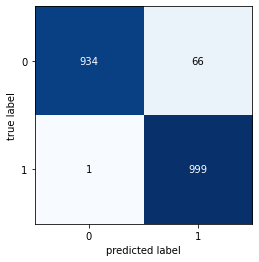

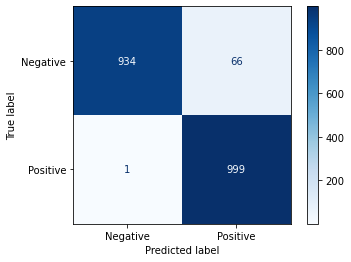

              precision    recall  f1-score   support

    Negative       0.93      1.00      0.97       935
    Positive       1.00      0.94      0.97      1065

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [14]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


rounded_predictions = model.predict_classes(test_data_inv, batch_size=128, verbose=0)

import numpy as np
#rounded_labels=np.argmax(test_labels, axis=1)
y_pred = []
print(rounded_predictions.size)
for i in range(0,rounded_predictions.size):
    if (rounded_predictions[i]>0.8):
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)
plot_confusion_matrix(conf_mat=cm)
target_names = ['Negative', 'Positive']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
target_names = ['Negative', 'Positive']
print(classification_report(y_pred, test_labels, target_names=target_names))
